In [13]:
import time 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

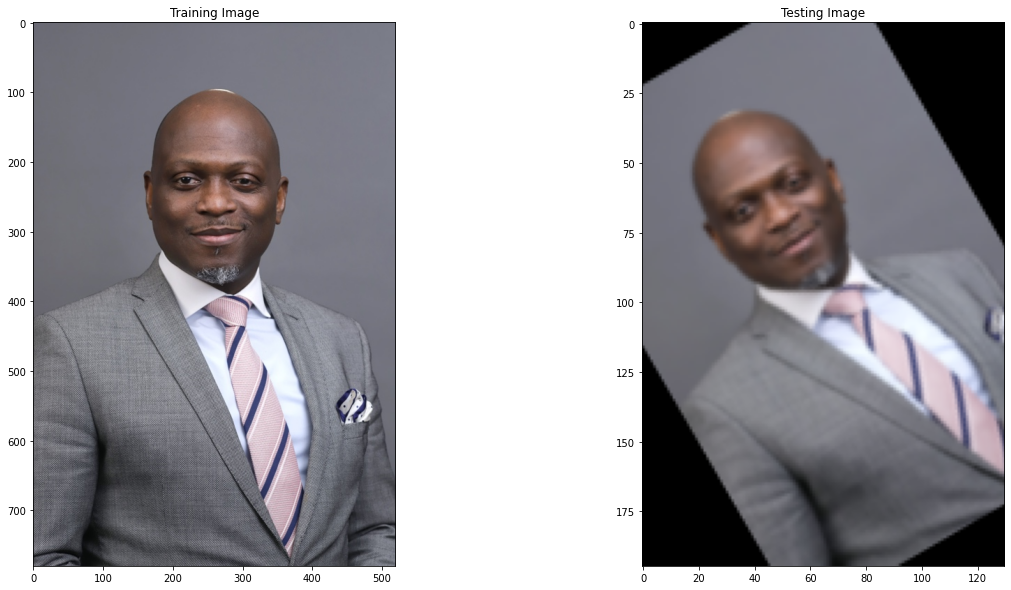

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = f'/Users/tmedeiros/Documents/Documents/Medeiros/UNT/SPRING 2021/CSCE 5222/coding/theo.jpg'
# path = f'https://github.com/tmedeiros/SIFT/blob/main/theo.jpg'

# Load the image
image1 = cv2.imread(path)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  536
Number of Keypoints Detected In The Query Image:  92


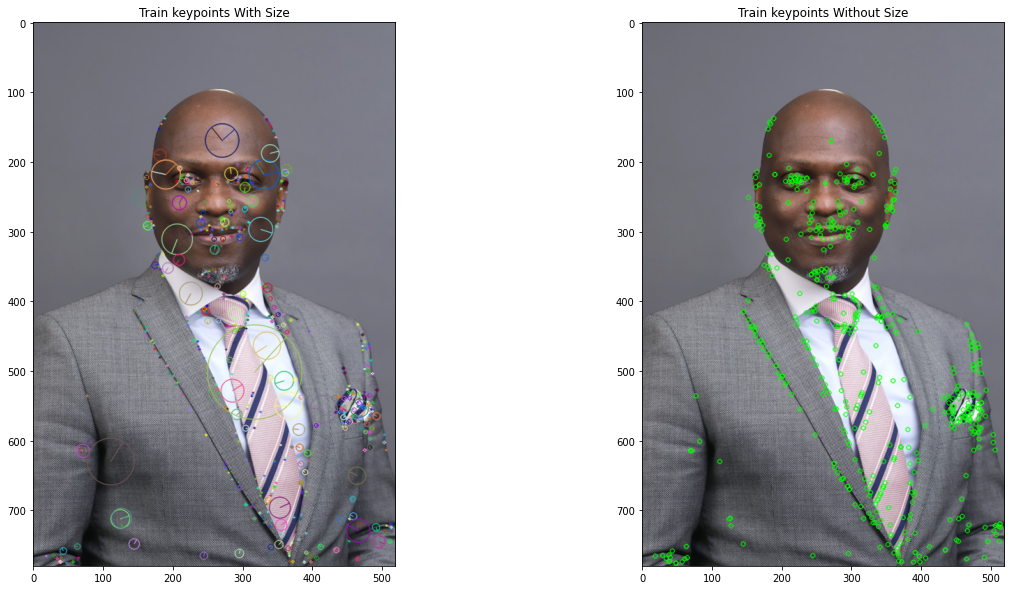

In [20]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

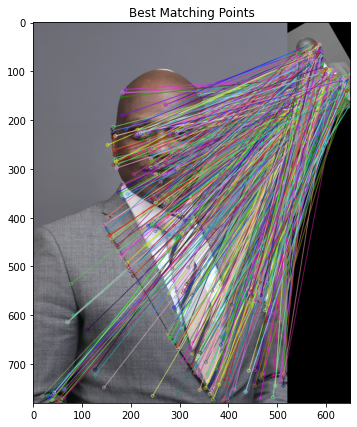


Number of Matching Keypoints Between The Training and Query Images:  536


In [12]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

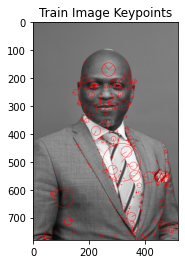

Match Found-
45 30
Not Enough match found-
28 30
Match Found-
37 30
Not Enough match found-
29 30
Match Found-
32 30
Not Enough match found-
30 30
Match Found-
37 30
Match Found-
39 30
Match Found-
33 30
Not Enough match found-
27 30
Match Found-
31 30
Not Enough match found-
29 30
Match Found-
34 30
Match Found-
32 30
Match Found-
33 30
Not Enough match found-
30 30
Match Found-
38 30
Not Enough match found-
27 30
Not Enough match found-
30 30
Not Enough match found-
28 30
Not Enough match found-
28 30
Not Enough match found-
26 30
Match Found-
33 30
Match Found-
33 30
Not Enough match found-
29 30
Match Found-
32 30
Not Enough match found-
26 30
Not Enough match found-
27 30
Not Enough match found-
27 30
Not Enough match found-
27 30
Match Found-
33 30
Not Enough match found-
25 30
Match Found-
32 30
Not Enough match found-
26 30
Not Enough match found-
27 30
Match Found-
37 30
Not Enough match found-
23 30
Not Enough match found-
30 30
Not Enough match found-
27 30
Match Found-
47 3

KeyboardInterrupt: 

In [18]:
# Threshold 
MIN_MATCH_COUNT=30

# Initiate SIFT detector
sift=cv2.xfeatures2d.SIFT_create()



# Create the Flann Matcher object
FLANN_INDEX_KDITREE=0
flannParam=dict(algorithm=FLANN_INDEX_KDITREE,tree=5)
flann=cv2.FlannBasedMatcher(flannParam,{})

train_img= cv2.imread(path,0)  # train image
kp1,desc1= sift.detectAndCompute(train_img,None) # find the keypoints and descriptors with SIFT
train_img_kp= cv2.drawKeypoints(train_img,kp1,None,(255,0,0),4) # draw keypoints of the train image
plt.imshow(train_img_kp)    # show the train image keypoints
plt.title('Train Image Keypoints')
plt.show()



# start capturing video
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)   # turn the frame captured into grayscale
    kp2, desc2 = sift.detectAndCompute(gray,None)   # find the keypoints and descriptors with SIFT  of the frame captured
    
    # Obtain matches using K-Nearest Neighbor Method
    # the result 'matches' is the number of similar matches found in both images
    matches=flann.knnMatch(desc2,desc1,k=2)


    # store all the good matches as per Lowe's ratio test.
    goodMatch=[]
    for m,n in matches:
        if(m.distance<0.75*n.distance):
            goodMatch.append(m)


    # If enough matches are found, we extract the locations of matched keypoints 
    # in both the images.
    # They are passed to find the perpective transformation.
    # Once we get this 3x3 transformation matrix, we use it to transform the corners 
    # of query image to corresponding points in train image. Then we draw it.

    if(len(goodMatch)>MIN_MATCH_COUNT):
        tp=[]  # src_pts
        qp=[]  # dst_pts
        for m in goodMatch:
            tp.append(kp1[m.trainIdx].pt)
            qp.append(kp2[m.queryIdx].pt)
        tp,qp=np.float32((tp,qp))

        H,status=cv2.findHomography(tp,qp,cv2.RANSAC,3.0)


        h,w = train_img.shape
        train_outline= np.float32([[[0,0],[0,h-1],[w-1,h-1],[w-1,0]]])
        query_outline = cv2.perspectiveTransform(train_outline,H)

        cv2.polylines(frame,[np.int32(query_outline)],True,(0,255,0),5)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
        print("Match Found-")
        print(len(goodMatch),MIN_MATCH_COUNT)

    else:
        print("Not Enough match found-")
        print(len(goodMatch),MIN_MATCH_COUNT)
    cv2.imshow('result',frame)

    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()

